In [1]:
#importing libraries
import numpy as np
import pandas as pd

#matplotlib and seaborn for data visualization
import matplotlib.pyplot as plt
import seaborn as sns


#importing warnings to ignore warnings
import warnings
warnings.filterwarnings('ignore')

#importing stats from scipy
from scipy import stats

In [2]:
data=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
data.shape

(7043, 21)

In [4]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Dataset can be divided into two types: 
    
    1. Nominal/Catagorical 
    2. Ordinal/numerical data :['tenure','MonthlyCharges','TotalCharges'] 
    3. Alpha_numeric data :['customerID','']From above data types, TotalCharges is object which is practically not possible. Hence checking for if attribute has null values/special characters/missing values.

In [5]:
data['TotalCharges'].isnull().sum()

0

In [7]:
data[data['TotalCharges']==(' ')]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


'TotalCharges' has blank spaces in 11 rows

In [8]:
data['TotalCharges']=data['TotalCharges'].replace(' ',np.nan)

In [9]:
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

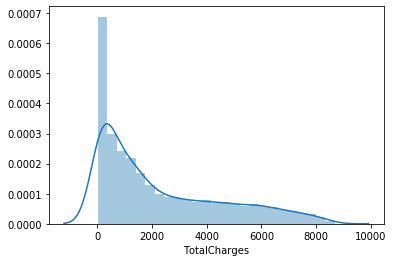

In [12]:
sns.distplot(data['TotalCharges'])

In [13]:
#Since the data in not normally distributed. 
# replacing nan values with median.
data['TotalCharges']=data['TotalCharges'].fillna(data['TotalCharges'].median())

In [14]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [15]:
for i in data.columns:
    print(i)
    print('# of unique values -->', data[i].nunique())
    if data[i].nunique()<15:
        print(data[i].unique())
    else:
        print(data[i].describe())
    print('______________________________________')

customerID
# of unique values --> 7043
count           7043
unique          7043
top       4707-YNOQA
freq               1
Name: customerID, dtype: object
______________________________________
gender
# of unique values --> 2
['Female' 'Male']
______________________________________
SeniorCitizen
# of unique values --> 2
[0 1]
______________________________________
Partner
# of unique values --> 2
['Yes' 'No']
______________________________________
Dependents
# of unique values --> 2
['No' 'Yes']
______________________________________
tenure
# of unique values --> 73
count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64
______________________________________
PhoneService
# of unique values --> 2
['No' 'Yes']
______________________________________
MultipleLines
# of unique values --> 3
['No phone service' 'No' 'Yes']
______________________________

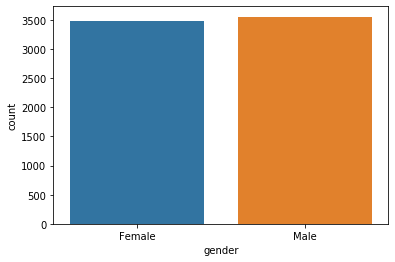

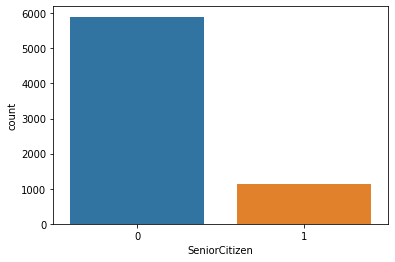

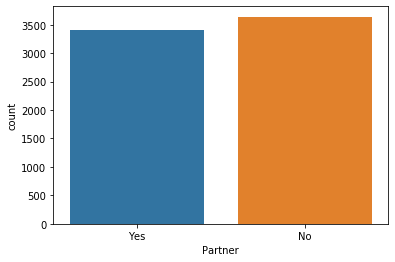

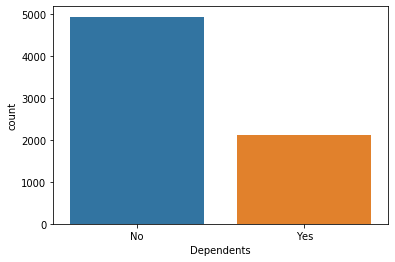

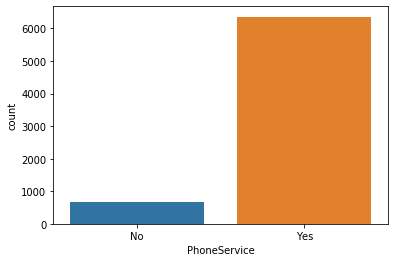

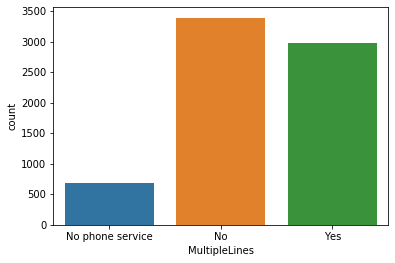

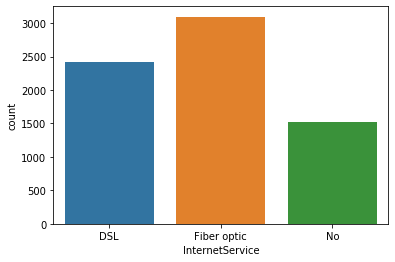

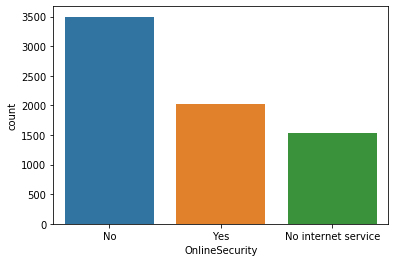

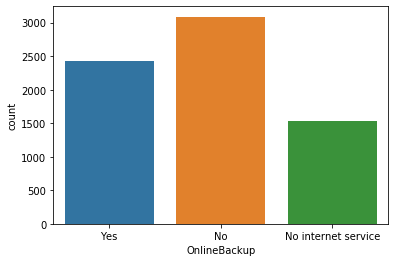

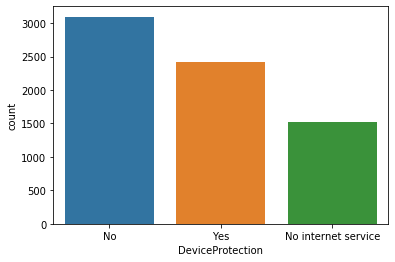

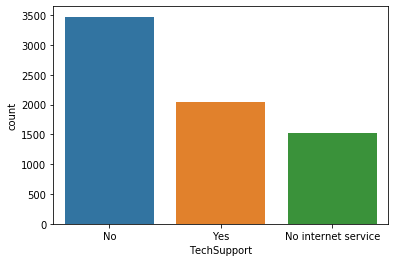

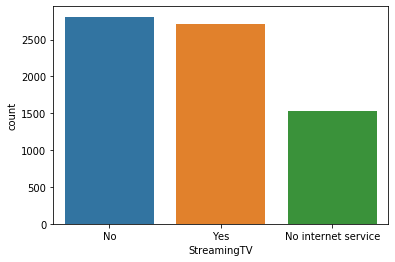

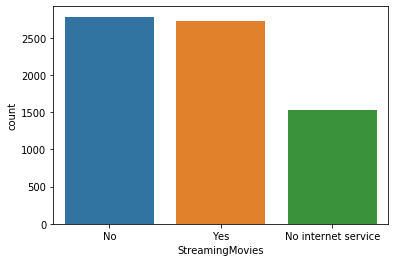

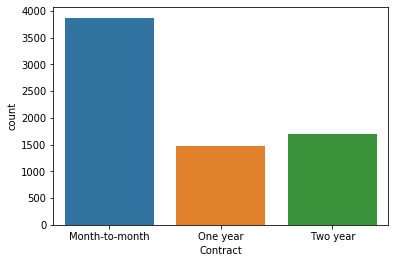

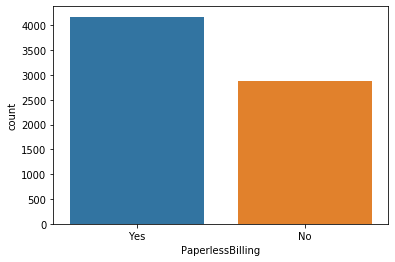

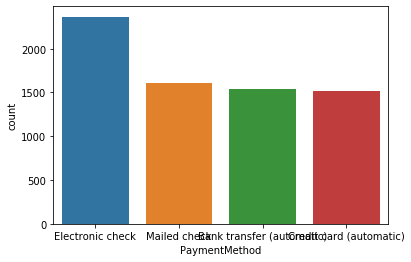

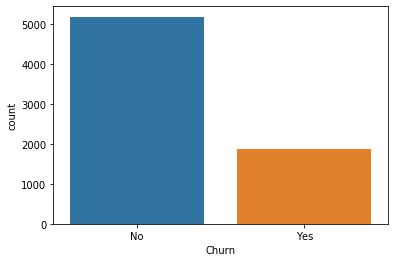

In [16]:
## Visulaization of catagorical data:
Catagorical_data=['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 
                  'InternetService', 'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport',
                  'StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn']

for i in Catagorical_data:
    sns.countplot(data[i])
    plt.show()

Observations: 
    
    1. Traget variable is imbalanced. More of customers have not churned compared to customers who have churned. 
    2. Approximately equal number of male and female customers are there. 
    3. Only 16% customers are Senior citizens. 
    4. 70% customers are not dependent. 
    5. 90% of customers use phone service. Amongst which 48% donot have multiple lines & 42% use multiple lines of connection. 
    6. 78% uses internet service, out of which 44% uses fiber optic and 34% uses DSL. 
    7. Out of 78% internet users, 37% have opted for online security rest 63% customers are prone to online threats as they have not opted for online security. 
    8. Out of 78% internet users, 56% have no online backup mechanism opted. Rest 54% have online backup. 
    9. Also, Out of 78% internet users, 56% have no device protection mechanism opted. Rest 54% have their device protected. 
    10.Out of 78% internet users, 63% have no Tech support. Only 37% have tech support facility opted. 
    11.Out of 78% internet users, 51% have not opted for streamingTV. 49% customers have opted for StreamingTV. 
    12.Out of 78% internet users, nearly 50% have opted for StreamingMovies. 
    13.Maximum of customers are month-to-month contarct(around 55%). 24% have two year contract and 21% customers have 1 yr contact. 
    14.59% of customesr have opted for paperlessbilling system. 
    15.There are 4 types of payment method: Electronic check,Mailed check,Bank transfer (automatic) & Credit card (automatic). 
    16.33% customers use Electronic Check payment method, 23% use mailed check, 22% do Bank transfer and rest 22% do payment through credit card.

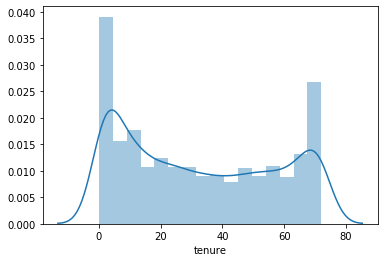

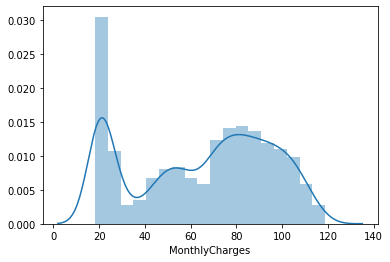

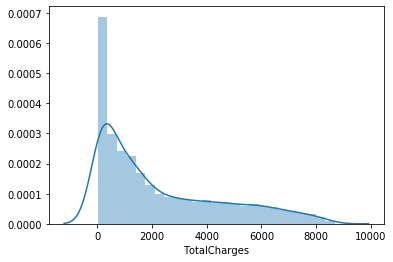

In [17]:
numeric_data=['tenure','MonthlyCharges','TotalCharges']
for i in numeric_data:
    sns.distplot(data[i],kde=True)
    plt.show()

Data is skewed.

In [18]:
#For analysis replacing churn values to numeric type.
#Replacing Yes to 1 and No to 0
data['Churn'] = data['Churn'].str.replace('No','0').str.replace('Yes','1')
data['Churn']=data['Churn'].astype(float)

Text(0.5, 1.0, 'Churn Status by Gender')

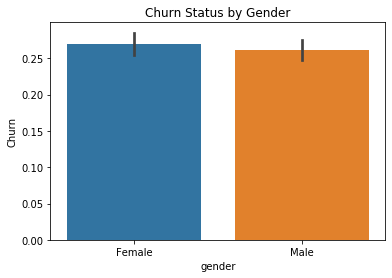

In [19]:
## Visulaization by comparing target variable with other variables.
sns.barplot(x="gender", y="Churn", data=data)
plt.title('Churn Status by Gender')


26% of both male and female customers got churned.

Text(0.5, 1.0, 'Churn Status by Genderand by SeniorCitizen')

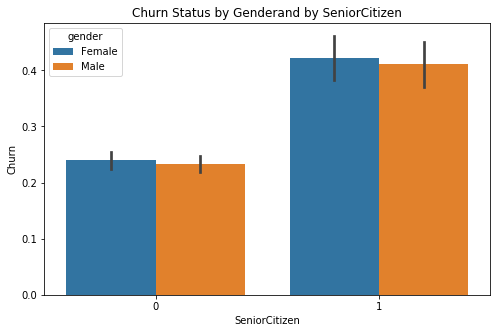

In [20]:
plt.figure(figsize=(8,5))
sns.barplot(x="SeniorCitizen", y="Churn", hue='gender',data=data)
plt.title('Churn Status by Genderand by SeniorCitizen')


More number of senior citizens got churned. Attrition rate of femalez is more compared to males.

Text(0.5, 1.0, 'Churn Status by Gender and by Partner')

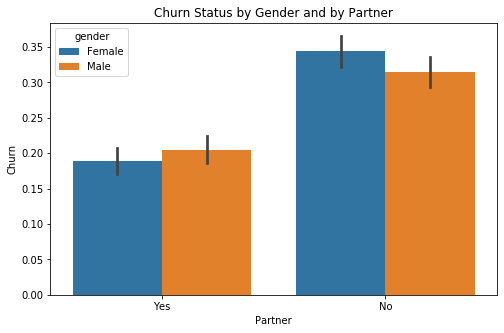

In [21]:
plt.figure(figsize=(8,5))
sns.barplot(x="Partner", y="Churn", hue='gender',data=data)
plt.title('Churn Status by Gender and by Partner')


Churning rate of partnered customers are less. Only 19.66% customeres got churned after partnership. Whereas, attrition arte is higher in unpartnered customers.

Text(0.5, 1.0, 'Churn Status by Gender and by PhoneService')

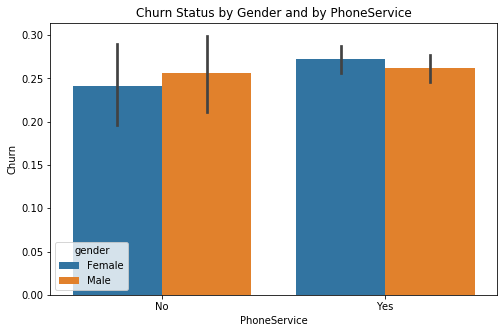

In [22]:
plt.figure(figsize=(8,5))
sns.barplot(x="PhoneService", y="Churn", hue='gender',data=data)
plt.title('Churn Status by Gender and by PhoneService')

Text(0.5, 1.0, 'Churn Status by Gender and by InternetService')

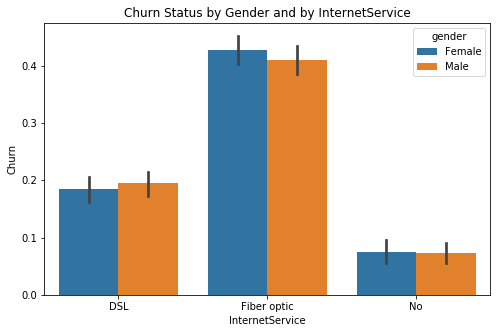

In [23]:
plt.figure(figsize=(8,5))
sns.barplot(x="InternetService", y="Churn", hue='gender',data=data)
plt.title('Churn Status by Gender and by InternetService')

Text(0.5, 1.0, 'Churn Status by Gender and by OnlineSecurity')

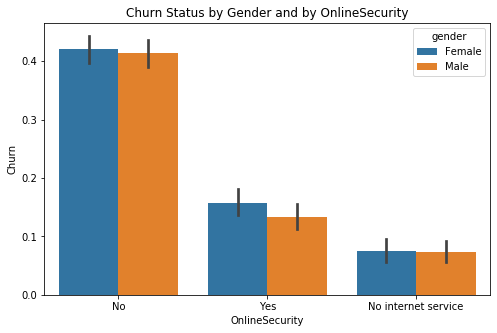

In [24]:
plt.figure(figsize=(8,5))
sns.barplot(x="OnlineSecurity", y="Churn", hue='gender',data=data)
plt.title('Churn Status by Gender and by OnlineSecurity')

Text(0.5, 1.0, 'Churn Status by Gender and by OnlineBackup')

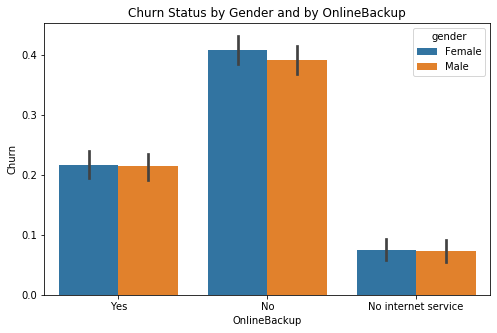

In [25]:
plt.figure(figsize=(8,5))
sns.barplot(x="OnlineBackup", y="Churn", hue='gender',data=data)
plt.title('Churn Status by Gender and by OnlineBackup')


Text(0.5, 1.0, 'Churn Status by Gender and by DeviceProtection')

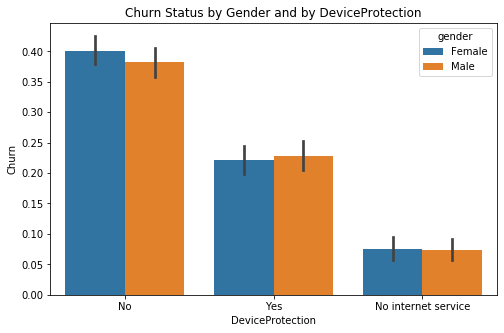

In [26]:
plt.figure(figsize=(8,5))
sns.barplot(x="DeviceProtection", y="Churn", hue='gender',data=data)
plt.title('Churn Status by Gender and by DeviceProtection')

Text(0.5, 1.0, 'Churn Status by Gender and by TechSupport')

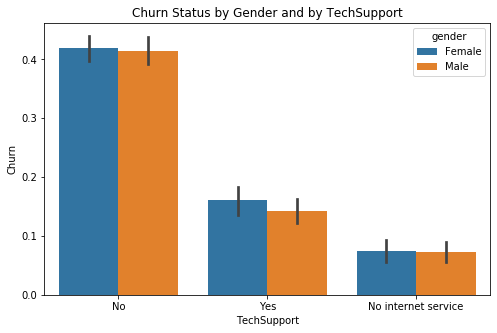

In [27]:
plt.figure(figsize=(8,5))
sns.barplot(x="TechSupport", y="Churn", hue='gender',data=data)
plt.title('Churn Status by Gender and by TechSupport')


Text(0.5, 1.0, 'Churn Status by Gender and by StreamingTV')

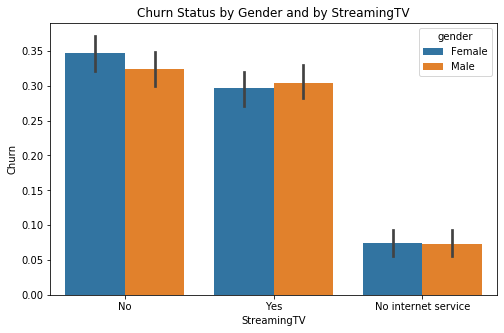

In [28]:
plt.figure(figsize=(8,5))
sns.barplot(x="StreamingTV", y="Churn", hue='gender',data=data)
plt.title('Churn Status by Gender and by StreamingTV')

Text(0.5, 1.0, 'Churn Status by Gender and by StreamingMovies')

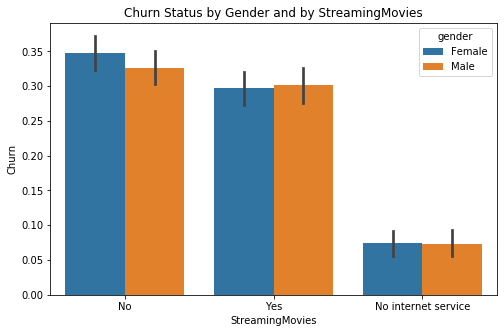

In [29]:
plt.figure(figsize=(8,5))
sns.barplot(x="StreamingMovies", y="Churn", hue='gender',data=data)
plt.title('Churn Status by Gender and by StreamingMovies')

Text(0.5, 1.0, 'Churn Status by Gender and by Contract')

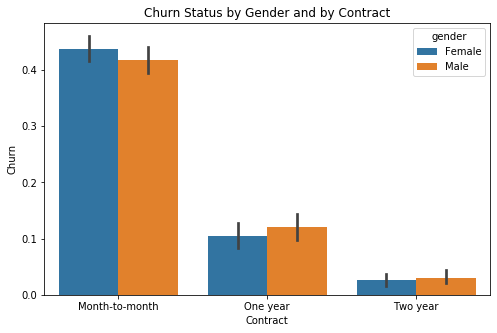

In [30]:
plt.figure(figsize=(8,5))
sns.barplot(x="Contract", y="Churn", hue='gender',data=data)
plt.title('Churn Status by Gender and by Contract')

Text(0.5, 1.0, 'Churn Status by Gender and by PaperlessBilling')

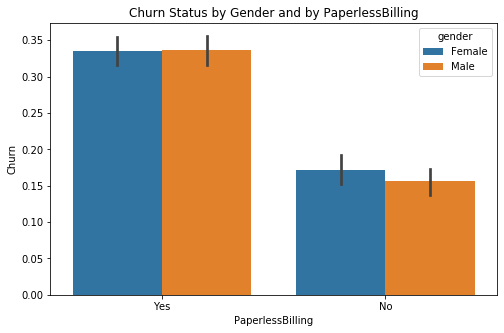

In [31]:
plt.figure(figsize=(8,5))
sns.barplot(x="PaperlessBilling", y="Churn", hue='gender',data=data)
plt.title('Churn Status by Gender and by PaperlessBilling')

Text(0.5, 1.0, 'Churn Status by Gender and by PaymentMethod')

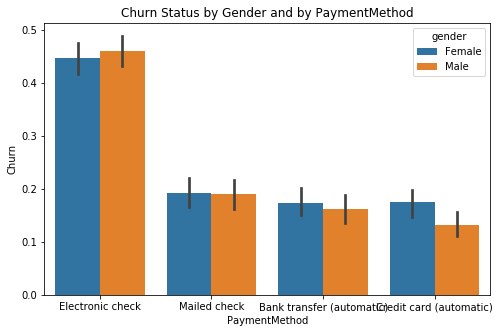

In [32]:
plt.figure(figsize=(8,5))
sns.barplot(x="PaymentMethod", y="Churn", hue='gender',data=data)
plt.title('Churn Status by Gender and by PaymentMethod')

In [33]:
data.drop(columns=['customerID'], inplace=True)

In [34]:
# the data is in categories so we converted using LabelEncoder
c=['gender', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in c:
    data[i]=le.fit_transform(data[i])
    
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0.0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.5,0.0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1.0
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0.0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1.0


In [35]:
print('Data types of dataset after applying ordinal encoding ---->\n')
data.dtypes

Data types of dataset after applying ordinal encoding ---->



gender                int32
SeniorCitizen         int64
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges         object
Churn               float64
dtype: object

In [36]:
data.drop(columns=['TotalCharges'], inplace=True)

In [37]:
#Statistical Summary
data.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,0.906432,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,0.265370
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,0.880162,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,1.000000


1. Mean and Standard deviation for almost all the attributes is nearly same. 2. Also mean and median is also nearly equal.

In [38]:
# Checking for Correlation 
data.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,0.370876,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.011942
MultipleLines,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.038037
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.047291
OnlineSecurity,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,-0.289309
OnlineBackup,-0.012057,-0.013632,0.153130,0.091015,0.370876,0.024105,0.117327,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,0.280980,-0.013370,-0.124847,0.119777,-0.195525


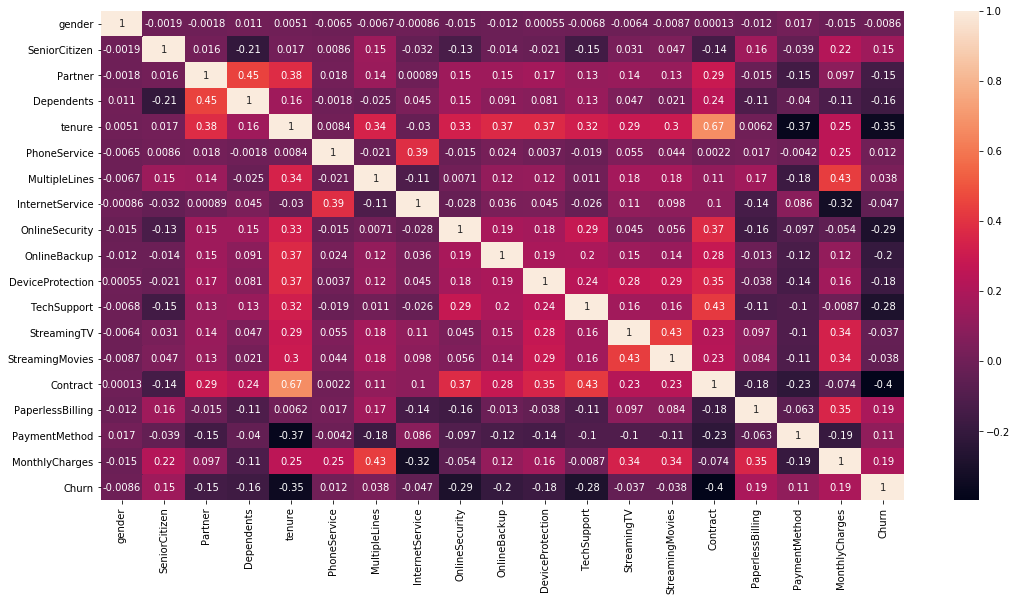

In [39]:
#Visulaization of Correlation
plt.figure(figsize=(18,9))
sns.heatmap(data.corr(),annot=True)

1. Churn has highest correlation with contact and tenure. 2. Churn has very least correlation with gender,phone service and CustomerID. 3. Churn has high positive correlation with MonthlyCharges.

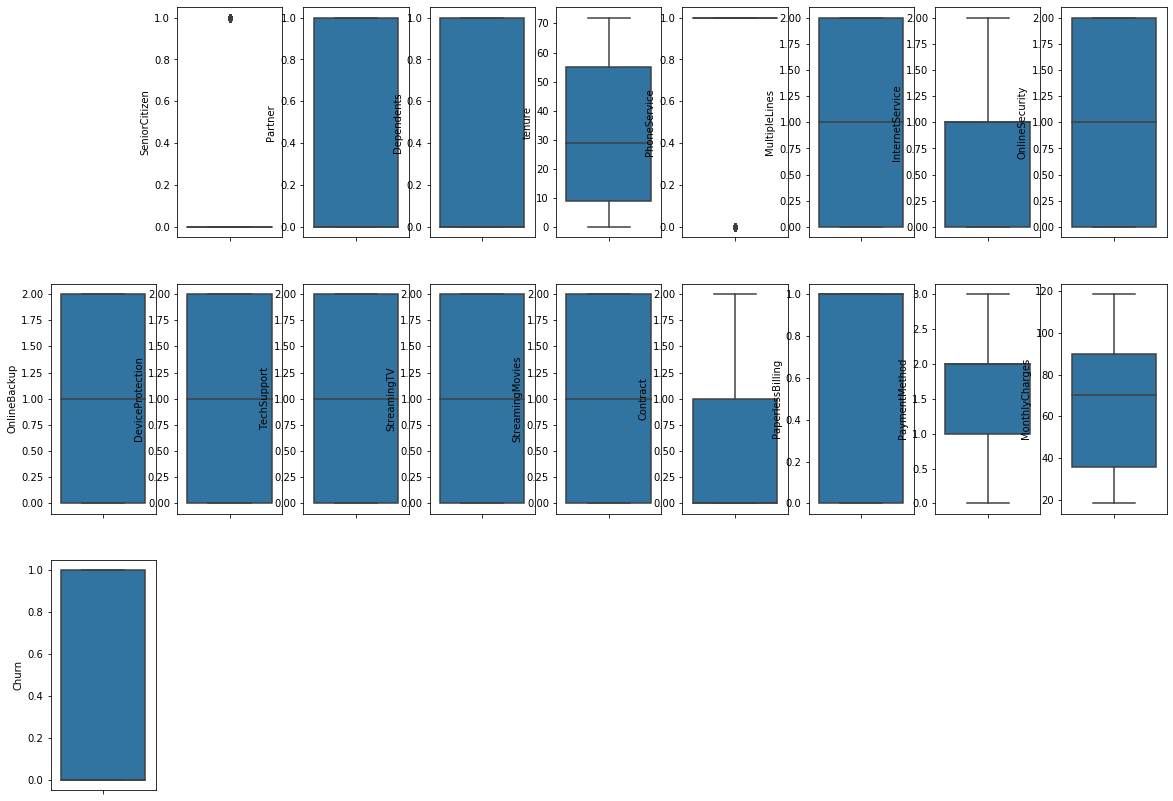

In [41]:
#cheking for outliers:
collist=data.columns.values
plt.figure(figsize=(20,50))
for i in range(1,len(collist)):
    plt.subplot(10,9,i+1)
    sns.boxplot(data[collist[i]],orient='v')
    plt.tight_layout

Dataset has no outliers.

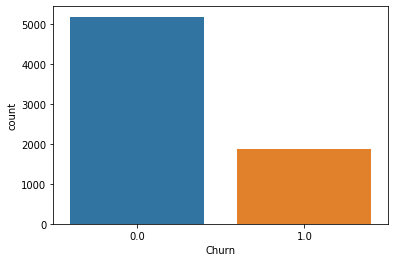

In [42]:
sns.countplot(x='Churn',data=data)

Data for target variable is imbalanced. hence using imblearn.smote to balance.

In [44]:
#Splitting the data inrto train and test

x=data.drop(['Churn'],axis=1)
y=data['Churn']

In [54]:
#model building
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB   
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.model_selection import cross_val_score              
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

#Using Grid Search to check the best parameters
from sklearn.model_selection import GridSearchCV

In [55]:
x_train,x_test,y_train,y_test=train_test_split(x_over,y_over,test_size=.30,random_state=45)

In [56]:
print('Shape of original dataset :',data.shape)
print('Shape of x_over:',x_over.shape)
print('Shape of y_over:',y_over.shape)
print('Shape of input - training set :', x_train.shape)
print('Shape of output - training set :', y_train.shape)
print('Shape of input - testing set :', x_test.shape)
print('Shape of output - testing set :', y_test.shape)

Shape of original dataset : (7043, 19)
Shape of x_over: (10348, 18)
Shape of y_over: (10348,)
Shape of input - training set : (7243, 18)
Shape of output - training set : (7243,)
Shape of input - testing set : (3105, 18)
Shape of output - testing set : (3105,)


In [57]:
#grid search cv for logistic regression classifier
lr=LogisticRegression()
parameters= {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
clf=GridSearchCV(lr,parameters)
clf.fit(x,y)
clf.best_params_

{'C': 10}

In [58]:
#logistic regression
lr=LogisticRegression(C=10)
lr.fit(x_train,y_train)
lr.score(x_train,y_train)
predlr=lr.predict(x_test)
score_lr=accuracy_score(y_test,predlr)
print("Accuracy Score:",accuracy_score(y_test,predlr))

print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))
print('_________________________________________________')
print('cross validation')
scorelr=cross_val_score(lr,x,y,cv=10)
print('Score of',lr,'is:')
print(scorelr)
print('Mean:',scorelr.mean())
print('Std:',scorelr.std())
cv_lr=scorelr.mean()

Accuracy Score: 0.7780998389694042
[[1158  403]
 [ 286 1258]]
              precision    recall  f1-score   support

         0.0       0.80      0.74      0.77      1561
         1.0       0.76      0.81      0.79      1544

    accuracy                           0.78      3105
   macro avg       0.78      0.78      0.78      3105
weighted avg       0.78      0.78      0.78      3105

_________________________________________________
cross validation
Score of LogisticRegression(C=10) is:
[0.80141844 0.8070922  0.8        0.83238636 0.78835227 0.78551136
 0.80681818 0.79971591 0.80255682 0.80965909]
Mean: 0.8033510638297873
Std: 0.012169163139984954


In [59]:
#gridSearchCV for decision tree
dt=DecisionTreeClassifier()
parameters={'criterion':('gini','entropy')}
clf=GridSearchCV(dt,parameters,scoring='accuracy',cv=10)
clf.fit(x,y)
clf.best_params_

{'criterion': 'entropy'}

In [60]:
#Using DescisionTreeClassifier()
dtc=DecisionTreeClassifier(criterion=('entropy'))
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
score_dtc=accuracy_score(y_test,preddtc)
print("Accuracy Score:",accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))
print('_________________________________________________')
print('cross validation')
scoredtc=cross_val_score(dtc,x,y,cv=10)
print('Score of',dtc,'is:')
print(scoredtc)
print('Mean:',scoredtc.mean())
print('Std:',scoredtc.std())
cv_dtc=scoredtc.mean()

Accuracy Score: 0.7977455716586151
[[1219  342]
 [ 286 1258]]
              precision    recall  f1-score   support

         0.0       0.81      0.78      0.80      1561
         1.0       0.79      0.81      0.80      1544

    accuracy                           0.80      3105
   macro avg       0.80      0.80      0.80      3105
weighted avg       0.80      0.80      0.80      3105

_________________________________________________
cross validation
Score of DecisionTreeClassifier(criterion='entropy') is:
[0.7248227  0.72624113 0.74042553 0.73579545 0.74147727 0.70738636
 0.72727273 0.71164773 0.73579545 0.73011364]
Mean: 0.7280977998065765
Std: 0.010807300237469687


In [61]:
#gridSearchCV for knn
knc=KNeighborsClassifier()
parameters={'n_neighbors':range(1,30)}
clf=GridSearchCV(knc,parameters,scoring='accuracy',cv=10)
clf.fit(x,y)
clf.best_params_

{'n_neighbors': 27}

In [62]:
#knn
knc=KNeighborsClassifier(n_neighbors=27)
knc.fit(x_train,y_train)
knc.score(x_train,y_train)
predknc=knc.predict(x_test)
score_knc=accuracy_score(y_test,predknc)
print("Accuracy Score:",accuracy_score(y_test,predknc))
print(confusion_matrix(y_test,predknc))
print(classification_report(y_test,predknc))
print('_________________________________________________')
print('cross validation')
scoreknc=cross_val_score(knc,x,y,cv=10)
print('Score of',knc,'is:')
print(scoreknc)
print('Mean:',scoreknc.mean())
print('Std:',scoreknc.std())
cv_knn=scoreknc.mean()

Accuracy Score: 0.759098228663446
[[1042  519]
 [ 229 1315]]
              precision    recall  f1-score   support

         0.0       0.82      0.67      0.74      1561
         1.0       0.72      0.85      0.78      1544

    accuracy                           0.76      3105
   macro avg       0.77      0.76      0.76      3105
weighted avg       0.77      0.76      0.76      3105

_________________________________________________
cross validation
Score of KNeighborsClassifier(n_neighbors=27) is:
[0.79432624 0.80425532 0.7929078  0.78835227 0.78551136 0.77556818
 0.80965909 0.796875   0.77698864 0.80113636]
Mean: 0.7925580270793037
Std: 0.010597880291798143


In [64]:
#grid search cv for Random Forest Classifer
from sklearn.ensemble import RandomForestClassifier

parameters = {'n_estimators':range(100,200,300)}
rf=RandomForestClassifier(random_state=42)
brf=GridSearchCV(rf,parameters)
brf.fit(x_train,y_train)
brf.best_params_

{'n_estimators': 100}

In [65]:
#Using Random Forest Classifier

rf=RandomForestClassifier(criterion='entropy', random_state=45,n_estimators=100)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
score_rf=accuracy_score(y_test,predrf)
print('accuracy score:',accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))
print('_________________________________________________')
print('cross validation')
scorerf=cross_val_score(rf,x,y,cv=10)
print('Score of',rf,'is:')
print(scorerf)
print('Mean:',scorerf.mean())
print('Std:',scorerf.std())
cv_rf=scorerf.mean()

accuracy score: 0.8344605475040258
[[1288  273]
 [ 241 1303]]
              precision    recall  f1-score   support

         0.0       0.84      0.83      0.83      1561
         1.0       0.83      0.84      0.84      1544

    accuracy                           0.83      3105
   macro avg       0.83      0.83      0.83      3105
weighted avg       0.83      0.83      0.83      3105

_________________________________________________
cross validation
Score of RandomForestClassifier(criterion='entropy', random_state=45) is:
[0.80141844 0.8        0.79148936 0.79119318 0.77556818 0.75142045
 0.81534091 0.78693182 0.78977273 0.80823864]
Mean: 0.791137371050935
Std: 0.017035316679310852


In [66]:
#gaussion NB
gnb=GaussianNB()
gnb.fit(x_train,y_train)
gnb.score(x_train,y_train)
predgnb=gnb.predict(x_test)
score_gnb=accuracy_score(y_test,predgnb)
print("Accuracy Score:",accuracy_score(y_test,predgnb))
print(confusion_matrix(y_test,predgnb))
print(classification_report(y_test,predgnb))
print('_________________________________________________')
print('cross validation')
scoregnb=cross_val_score(gnb,x,y,cv=10)
print('Score of',gnb,'is:')
print(scoregnb)
print('Mean:',scoregnb.mean())
print('Std:',scoregnb.std())
cv_gnb=scoregnb.mean()

Accuracy Score: 0.7764895330112721
[[1150  411]
 [ 283 1261]]
              precision    recall  f1-score   support

         0.0       0.80      0.74      0.77      1561
         1.0       0.75      0.82      0.78      1544

    accuracy                           0.78      3105
   macro avg       0.78      0.78      0.78      3105
weighted avg       0.78      0.78      0.78      3105

_________________________________________________
cross validation
Score of GaussianNB() is:
[0.76028369 0.75602837 0.75319149 0.77840909 0.76846591 0.72443182
 0.75142045 0.76420455 0.73579545 0.76704545]
Mean: 0.7559276273372019
Std: 0.015161843605356535


In [67]:
# our target variable is imbalance so we use resampling techniue to balance it then we will use model buildings
#smote

In [68]:
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x_train_os,y_train_os=SM.fit_resample(x,y)

In [69]:
print(y_over.value_counts())

1.0    5174
0.0    5174
Name: Churn, dtype: int64


In [70]:
#grid search cv for logistic regression classifier over sample
lr=LogisticRegression()
parameters= {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
clf=GridSearchCV(lr,parameters)
clf.fit(x_train_os,y_train_os)
clf.best_params_

{'C': 1000}

In [71]:
#logistic regression over sample
lr=LogisticRegression(C=0.1000)
lr.fit(x_train_os,y_train_os)
lr.score(x_train_os,y_train_os)
predlr=lr.predict(x_test)
score_lr_os=accuracy_score(y_test,predlr)
print("Accuracy Score:",accuracy_score(y_test,predlr))

print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))
print('_________________________________________________')
print('cross validation')
scorelr=cross_val_score(lr,x,y,cv=10)
print('Score of',lr,'is:')
print(scorelr)
print('Mean:',scorelr.mean())
print('Std:',scorelr.std())
cv_lr_os=scorelr.mean()

Accuracy Score: 0.7793880837359098
[[1155  406]
 [ 279 1265]]
              precision    recall  f1-score   support

         0.0       0.81      0.74      0.77      1561
         1.0       0.76      0.82      0.79      1544

    accuracy                           0.78      3105
   macro avg       0.78      0.78      0.78      3105
weighted avg       0.78      0.78      0.78      3105

_________________________________________________
cross validation
Score of LogisticRegression(C=0.1) is:
[0.80141844 0.8070922  0.8        0.83238636 0.78977273 0.78835227
 0.80397727 0.80255682 0.80113636 0.80681818]
Mean: 0.8033510638297873
Std: 0.011398653933085524


In [72]:
#gridSearchCV for decision tree for over sample
dt=DecisionTreeClassifier()
parameters={'criterion':('gini','entropy')}
clf=GridSearchCV(dt,parameters,scoring='accuracy',cv=10)
clf.fit(x_train_os,y_train_os)
clf.best_params_

{'criterion': 'gini'}

In [73]:
#Using DescisionTreeClassifier() for over sample
dtc=DecisionTreeClassifier(criterion=('gini'))
dtc.fit(x_train_os,y_train_os)
dtc.score(x_train_os,y_train_os)
preddtc=dtc.predict(x_test)
score_dtc_os=accuracy_score(y_test,preddtc)
print("Accuracy Score:",accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))
print('_________________________________________________')
print('cross validation')
scoredtc=cross_val_score(dtc,x,y,cv=10)
print('Score of',dtc,'is:')
print(scoredtc)
print('Mean:',scoredtc.mean())
print('Std:',scoredtc.std())
cv_dtc_os=scoredtc.mean()

Accuracy Score: 0.9668276972624799
[[1560    1]
 [ 102 1442]]
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97      1561
         1.0       1.00      0.93      0.97      1544

    accuracy                           0.97      3105
   macro avg       0.97      0.97      0.97      3105
weighted avg       0.97      0.97      0.97      3105

_________________________________________________
cross validation
Score of DecisionTreeClassifier() is:
[0.72198582 0.75035461 0.74184397 0.72585227 0.74147727 0.72159091
 0.71875    0.70596591 0.71732955 0.73721591]
Mean: 0.7282366215344939
Std: 0.013130788071235367


In [74]:
#gridSearchCV for knn for over sample
knc=KNeighborsClassifier()
parameters={'n_neighbors':range(1,30)}
clf=GridSearchCV(knc,parameters,scoring='accuracy',cv=10)
clf.fit(x_train_os,y_train_os)
clf.best_params_

{'n_neighbors': 1}

In [75]:
#knn for over sample
knc=KNeighborsClassifier(n_neighbors=1)
knc.fit(x_train_os,y_train_os)
knc.score(x_train_os,y_train_os)
predknc=knc.predict(x_test)
score_knn_os=accuracy_score(y_test,predknc)
print("Accuracy Score:",accuracy_score(y_test,predknc))
print(confusion_matrix(y_test,predknc))
print(classification_report(y_test,predknc))
print('_________________________________________________')
print('cross validation')
scoreknc=cross_val_score(knc,x,y,cv=10)
print('Score of',knc,'is:')
print(scoreknc)
print('Mean:',scoreknc.mean())
print('Std:',scoreknc.std())
cv_knn_os=scoreknc.mean()

Accuracy Score: 0.9809983896940419
[[1556    5]
 [  54 1490]]
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98      1561
         1.0       1.00      0.97      0.98      1544

    accuracy                           0.98      3105
   macro avg       0.98      0.98      0.98      3105
weighted avg       0.98      0.98      0.98      3105

_________________________________________________
cross validation
Score of KNeighborsClassifier(n_neighbors=1) is:
[0.73617021 0.74893617 0.75460993 0.73153409 0.703125   0.72869318
 0.71306818 0.72585227 0.73295455 0.75710227]
Mean: 0.7332045857511283
Std: 0.016349570167869178


In [76]:
#so we got knc is best model using smote with less differenve with cross validation

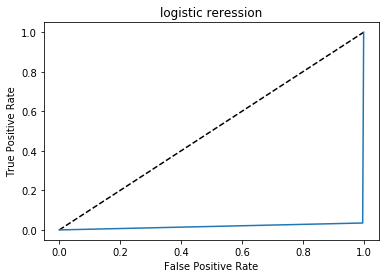

0.7796054160180301


In [77]:
#AUC_ROC Curve of random forest classifier for over sample
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
y_pred_prob=knc.predict_proba(x_test)[:,:1]
fpr,tpr,thredholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='RFC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('logistic reression')
plt.show()
auc_score=roc_auc_score(y_test,lr.predict(x_test))
print(auc_score)

In [78]:
#Saving the model
import joblib

#Save the model as a pickle in a file
joblib.dump(knc,'customer_churn.pkl')

['customer_churn.pkl']